# Criando seu próprio indicador

In [4]:
!pip install MetaTrader5

## Análise e manipulação de dados

In [1]:
import numpy as np
import pandas as pd

## Dados séries temporais

In [2]:
from datetime import datetime, timedelta
import pytz

In [3]:
# Bibliotecas gráficas

import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
# Integração com MetaTrader 5

import MetaTrader5 as mt5

In [5]:
mt5.initialize()

True

In [9]:
datetime.now()

datetime.datetime(2022, 11, 8, 9, 27, 14, 930391)

In [66]:
# Definir Datas
timezone = pytz.timezone("America/Sao_Paulo")
data_inicio = datetime.now() - timedelta(days=5)
data_fim = datetime.now()
cotacoes_mt5_all = []
tickers_IBOV = ['PETR4', 'ITUB4', 'VALE3']

In [67]:
for ticker in tickers_IBOV:
    cotacoes_mt5_ticker = mt5.copy_rates_range(ticker, mt5.TIMEFRAME_M5, data_inicio,data_fim)
    cotacoes_mt5_ticker = pd.DataFrame(cotacoes_mt5_ticker)
    cotacoes_mt5_ticker['ticker'] = str(ticker)
    cotacoes_mt5_ticker.index = pd.to_datetime(cotacoes_mt5_ticker['time'], unit='s')
    cotacoes_mt5_ticker = cotacoes_mt5_ticker.drop('time', axis = 1)
    cotacoes_mt5_all.append(cotacoes_mt5_ticker)

In [68]:
# usar enumare para facilitar a identificação dos elementos da lista.
list(enumerate(tickers_IBOV))

[(0, 'PETR4'), (1, 'ITUB4'), (2, 'VALE3')]

In [69]:
dados_itub = cotacoes_mt5_all[1].copy()

In [70]:
cotacoes_mt5_all[1]

,open,high,low,close,tick_volume,spread,real_volume,ticker
time,,,,,,,,
2022-11-03 14:10:00,30.23,30.26,30.21,30.23,468,1,196000,ITUB4
2022-11-03 14:15:00,30.24,30.25,30.22,30.23,509,1,121400,ITUB4
2022-11-03 14:20:00,30.24,30.25,30.21,30.23,465,1,144100,ITUB4
2022-11-03 14:25:00,30.23,30.26,30.22,30.24,436,1,94400,ITUB4
2022-11-03 14:30:00,30.24,30.24,30.22,30.22,361,1,94500,ITUB4
...,...,...,...,...,...,...,...,...
2022-11-08 10:45:00,29.37,29.38,29.31,29.34,243,1,41100,ITUB4
2022-11-08 10:50:00,29.35,29.35,29.27,29.28,324,1,83100,ITUB4
2022-11-08 10:55:00,29.27,29.38,29.25,29.37,429,1,71700,ITUB4


In [71]:
dados_itub

,open,high,low,close,tick_volume,spread,real_volume,ticker
time,,,,,,,,
2022-11-03 14:10:00,30.23,30.26,30.21,30.23,468,1,196000,ITUB4
2022-11-03 14:15:00,30.24,30.25,30.22,30.23,509,1,121400,ITUB4
2022-11-03 14:20:00,30.24,30.25,30.21,30.23,465,1,144100,ITUB4
2022-11-03 14:25:00,30.23,30.26,30.22,30.24,436,1,94400,ITUB4
2022-11-03 14:30:00,30.24,30.24,30.22,30.22,361,1,94500,ITUB4
...,...,...,...,...,...,...,...,...
2022-11-08 10:45:00,29.37,29.38,29.31,29.34,243,1,41100,ITUB4
2022-11-08 10:50:00,29.35,29.35,29.27,29.28,324,1,83100,ITUB4
2022-11-08 10:55:00,29.27,29.38,29.25,29.37,429,1,71700,ITUB4


In [72]:
dados_itub['amp_candle_ant'] = dados_itub.high.shift(1) - dados_itub.low.shift(1)
dados_itub['amp_candle_atual'] = dados_itub.high - dados_itub.low
dados_itub['var'] = (dados_itub.high - dados_itub.low.shift(1)) / dados_itub['amp_candle_ant']

In [73]:
dados_itub

,open,high,low,close,tick_volume,spread,real_volume,ticker,amp_candle_ant,amp_candle_atual,var
time,,,,,,,,,,,
2022-11-03 14:10:00,30.23,30.26,30.21,30.23,468,1,196000,ITUB4,NaN,0.05,NaN
2022-11-03 14:15:00,30.24,30.25,30.22,30.23,509,1,121400,ITUB4,0.05,0.03,0.800000
2022-11-03 14:20:00,30.24,30.25,30.21,30.23,465,1,144100,ITUB4,0.03,0.04,1.000000
2022-11-03 14:25:00,30.23,30.26,30.22,30.24,436,1,94400,ITUB4,0.04,0.04,1.250000
2022-11-03 14:30:00,30.24,30.24,30.22,30.22,361,1,94500,ITUB4,0.04,0.02,0.500000
...,...,...,...,...,...,...,...,...,...,...,...
2022-11-08 10:45:00,29.37,29.38,29.31,29.34,243,1,41100,ITUB4,0.08,0.07,0.500000
2022-11-08 10:50:00,29.35,29.35,29.27,29.28,324,1,83100,ITUB4,0.07,0.08,0.571429
2022-11-08 10:55:00,29.27,29.38,29.25,29.37,429,1,71700,ITUB4,0.08,0.13,1.375000


In [74]:
!pip install mplfinance

In [75]:
import mplfinance as mpf

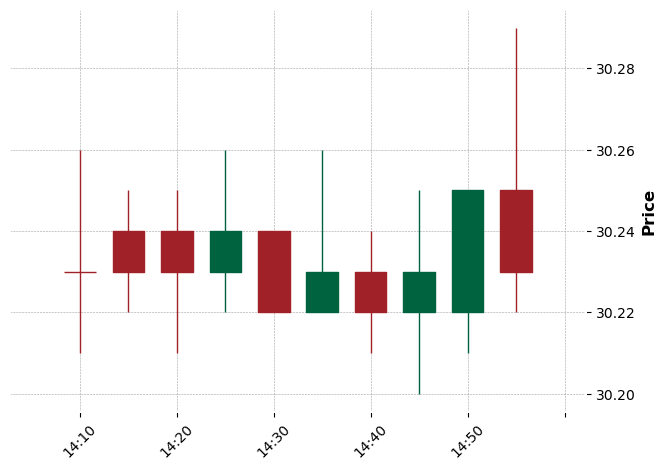

In [76]:
mpf.plot(dados_itub.iloc[:10],type='candle', style='charles')